In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib .pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
data.shape

(30, 2)

In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**Correlation**

In [15]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
data.describe()

**Data visualization**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

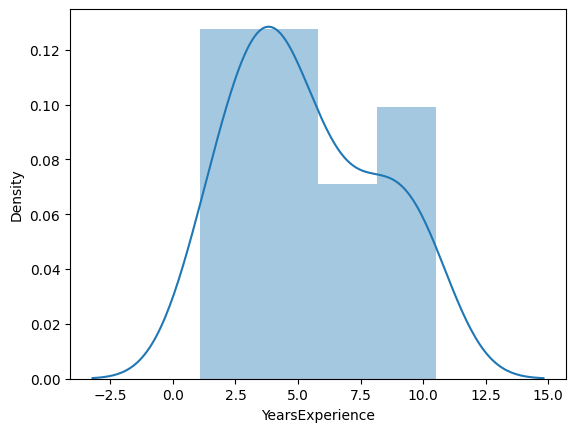

In [6]:
sns.distplot(data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

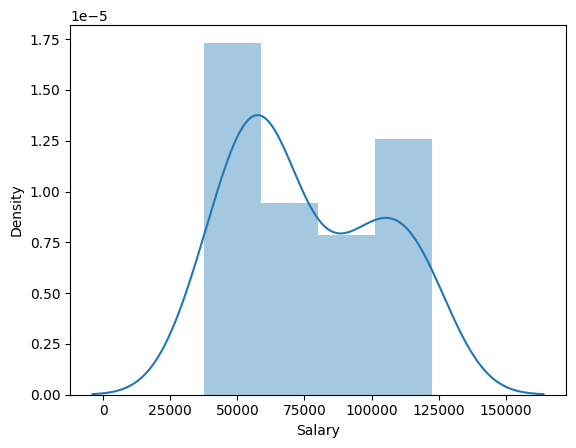

In [8]:
sns.distplot(data['Salary'])

**correlation**

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

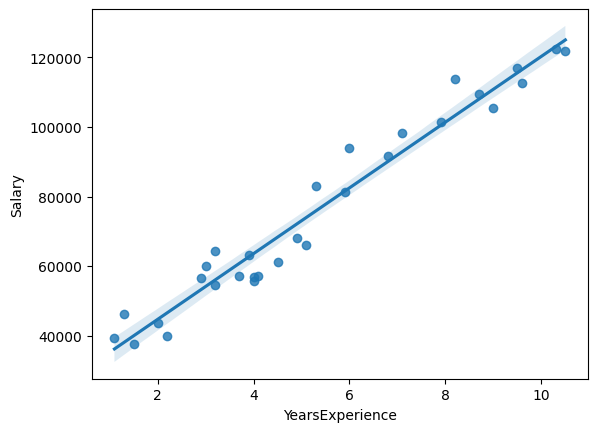

In [17]:

sns.regplot(x="YearsExperience", y="Salary", data=data)

In [18]:
#model building
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=data).fit()

In [19]:
#Coefficients
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [20]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [22]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,250,350])
newdata

0    200
1    250
2    350
dtype: int64

In [23]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,200
1,250
2,350


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        17:10:03   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""